In [187]:
from datetime import date, datetime
import pandas as pd
import plotly.offline as offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objs as go
offline.init_notebook_mode(connected=True)
pd.set_option('display.max_rows', 10)

import hvplot.pandas

#import relevant packages
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import panel as pn
import os
from pathlib import Path
from dotenv import load_dotenv

pn.extension('plotly')

import hvplot.pandas
# import matplotlib.pyplot as plt

In [170]:
#import climate data
climate_df = pd.read_csv('data/raw_climate_data.csv')

#drop index column
climate_df = climate_df.drop(climate_df.columns[0], axis = 1)
#convert date column to datetime
climate_df['Date'] = pd.to_datetime(climate_df['Date'])

#set date to index
climate_df = climate_df.set_index(['Date'])

climate_df.head()

#pull out only pm10 data
pm_10 = climate_df[climate_df['Specie']=='co']




climate_df['Specie'].unique()

array(['no2', 'humidity', 'wind speed', 'pressure', 'so2', 'pm25', 'o3',
       'dew', 'temperature', 'wind-speed', 'wind-gust', 'co', 'pm10',
       'wind gust', 'wd', 'precipitation', 'aqi', 'pol', 'neph'],
      dtype=object)

In [171]:
#create dataframe for each country

india = pm_10[pm_10['Country']=='IN']['median'].pct_change()
china = pm_10[pm_10['Country']=='CN']['median'].pct_change()
united_kingdom = pm_10[pm_10['Country']=='GB']['median'].pct_change()
unitied_states = pm_10[pm_10['Country']=='US']['median'].pct_change()
australia = pm_10[pm_10['Country']=='AU']['median'].pct_change()
japan = pm_10[pm_10['Country']=='JP']['median'].pct_change()

# shenzen = china[china['City']=='Shenzhen']['median'].pct_change()
# shenzen['median'].plot()

# india.head()

In [172]:
start_date = int(datetime(2019, 1, 1, 0, 0).timestamp())
end_date = int(datetime(2020, 1, 1, 0, 0).timestamp())


In [173]:
# yahoo url template (daily data: 2020-07-24 to 2020-11-25)
yahoo_url = 'https://query1.finance.yahoo.com/v7/finance/download/{tix}?period1={s}&period2={e}&interval=1d&events=history'
# get data for 3 tickers and concatenate together
tickers = ['^GSPC', '^BSESN','000001.SS', '^N225', '^FTSE', '^AXJO']
df = pd.DataFrame()
for ticker in tickers:
    url = yahoo_url.format(tix=ticker,s=start_date,e=end_date)
    df_tmp = pd.read_csv(url)
    df_tmp['Ticker'] = ticker
    df_tmp['StockPctChange'] = df_tmp['Close'].pct_change()
    df = pd.concat([df, df_tmp])
df.to_csv('data/stock_2019.csv')
fig = px.line(df, x="Date", y="StockPctChange", color='Ticker')
fig.show()


In [174]:
start_date = int(datetime(2020, 1, 1, 0, 0).timestamp())
end_date = int(datetime(2021, 1, 1, 0, 0).timestamp())
# yahoo url template (daily data: 2020-07-24 to 2020-11-25)
yahoo_url = 'https://query1.finance.yahoo.com/v7/finance/download/{tix}?period1={s}&period2={e}&interval=1d&events=history'
# get data for 3 tickers and concatenate together
tickers = ['^GSPC', '^BSESN','000001.SS', '^N225', '^FTSE', '^AXJO']
df = pd.DataFrame()
for ticker in tickers:
    url = yahoo_url.format(tix=ticker,s=start_date,e=end_date)
    df_tmp = pd.read_csv(url)
    df_tmp['Ticker'] = ticker
    df_tmp['StockPctChange'] = df_tmp['Close'].pct_change()
    df = pd.concat([df, df_tmp])
df.to_csv('data/stock_2020.csv')

In [175]:
fig = px.line(df, x="Date", y="StockPctChange", color='Ticker')
fig.show()

In [220]:
# fig = px.line(df_india_concat)
# fig.show()

In [233]:
country_dict = {'IN' : '^BSESN',
                'CN' : '000001.SS',
                'JP' : '^N225',
                'AU' : '^AXJO',
                'GB' : '^FTSE',
                'US' : '^GSPC'}

def corr_graph_maker(country='IN', polutant='co'):
    polutant_df = climate_df[climate_df['Specie'] == polutant]
    polutant_df_country = polutant_df[polutant_df['Country']== country]['median'].pct_change()
    df_stock = df[df['Ticker'] == country_dict[country]].set_index('Date')

    df_stock.index = df_stock.index.astype('datetime64[ns]')
    df_stock_polutants = pd.DataFrame({'Date':polutant_df_country.index, 'PolutantPctChange':polutant_df_country.values})
    df_stock_polutants.set_index('Date', inplace=True)

    df_stock_polutants = df_stock_polutants[~df_stock_polutants.index.duplicated(keep='first')]
    
    df_stock_concat = pd.concat([df_stock, df_stock_polutants], join='inner', axis=1)

    df_stock_concat = df_stock_concat[['StockPctChange', 'PolutantPctChange']]

    # df_india_concat.rolling(20).corr().plot()
    ax = df_stock_concat['StockPctChange'].rolling(20).corr(df_stock_concat['PolutantPctChange']).plot(figsize=(20,10))
    return ax


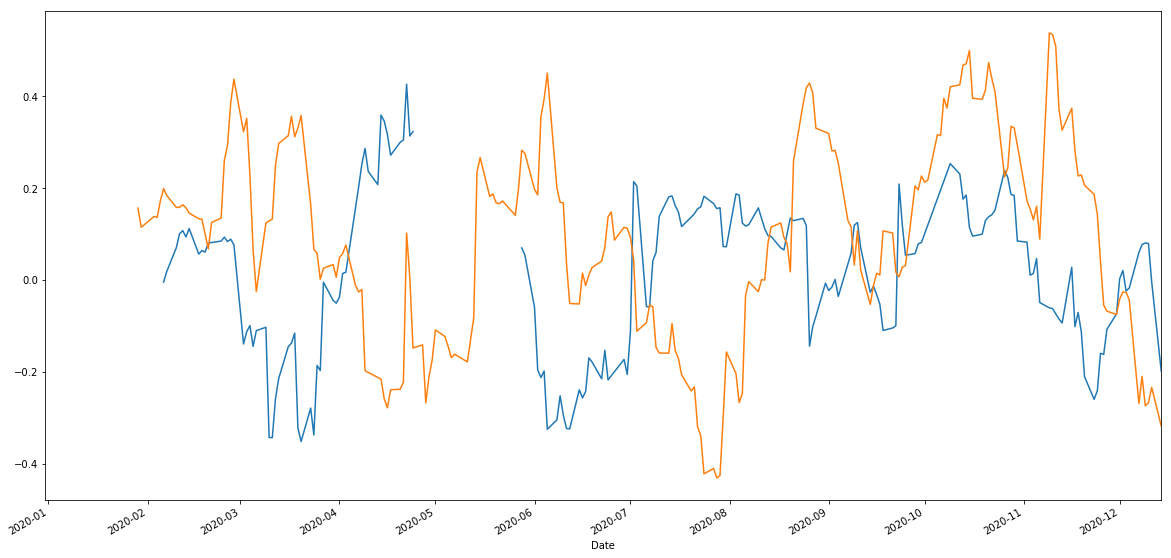

In [236]:
ax = corr_graph_maker('CN', 'co')
# ax = corr_graph_maker('IN', 'co')
ax = corr_graph_maker('GB', 'co')
# ax = corr_graph_maker('US', 'pm10')
# ax = corr_graph_maker('AU', 'pm10')
# ax = corr_graph_maker('JP', 'pm10')
